# Workshop 3 - Exploratory Data Analysis (EDA)

In this workshop we're going to take the data we downloaded and processed last week and review the key features of the data. In order to do this we're going to make use of plots and graphics to clearly represent and showcase important facets of the data. 

EDA is one of the more important steps of the data science process and demonstrating that you've reviewed and understood the data is really important when asked to perform data science, analytics or modeling tasks in the future.

Lets run through the steps together (there are some questions and some blanks to fill in as we run through).

## Imports

In [1]:
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1. Load Data

From last week you should have the following data in your local directory:
```
- data/gene_match_data.csv
- data/amr_data.csv
- data/e_coli_summary_data.csv
```

If not, please raise your hand and we can pause to make sure everyone has the data ready to go

In [2]:
def load_data():
    """
    Load the data needed for Workshop 3
    """
    gene_alignment_df = pd.read_csv('../data/gene_match_data.csv')
    gene_alignment_df = gene_alignment_df.rename(columns={'ref_name':'genome_id'}).drop(columns=['Unnamed: 0'])
    amr_df = pd.read_csv('../data/amr_data.csv').drop(columns=['Unnamed: 0'])
    genome_summary_df = pd.read_csv('../data/e_coli_summary_data.csv').drop(columns=['Unnamed: 0'])

    # Subset IDS
    genome_summary_df = genome_summary_df[genome_summary_df.genome_id.isin(gene_alignment_df.genome_id.unique())]
    amr_df = amr_df[amr_df.genome_id.isin(gene_alignment_df.genome_id.unique())]
    
    return gene_alignment_df, amr_df, genome_summary_df

gene_alignment_df, amr_df, genome_summary_df = load_data()

## 2. Summarize and Review Data

Lets first take a look through the data we're using and recap what the important elements are

### 2a. Take a glance at the data itself

In [3]:
gene_alignment_df.head(5)

,genome_id,contig,res_gene,match_start,match_end,match_qual,query_str,ref_gene_str
0,562.11346,FLKS01000064,gb|U00096.3|-|3324062-3324911|ARO:3003386|Ecol...,96835,97684,849M,ATGAAACTCTTTGCCCAGGGTACTTCACTGGACCTTAGCCATCCTC...,ATGAAACTCTTTGCCCAGGGTACTTCACTGGACCTTAGCCATCCTC...
1,562.11346,FLKS01000044,gb|AP009048.1|+|3760295-3762710|ARO:3003303|Ec...,61096,63511,2415M,ATGTCGAATTCTTATGACTCCTCCAGTATCAAAGTCCTGAAAGGGC...,ATGTCGAATTCTTATGACTCCTCCAGTATCAAAGTCCTGAAAGGGC...
2,562.11346,FLKS01000070,gb|BA000007.3|+|4990267-4994296|ARO:3003288|Ec...,22038,26067,4029M,TTACTCGTCTTCCAGTTCGATGTTGATACCCAGCGAACGAATCTCT...,TTACTCGTCTTCCAGTTCGATGTTGATACCCAGCGAACGAATCTCT...
3,562.11346,FLKS01000068,gb|U00096.3|-|2336792-2339420|ARO:3003294|Ecol...,755765,758393,2628M,TTATTCTTCTTCTGGCTCGTCGTCAACGTCCACTTCCGGAGCGATT...,TTATTCTTCTTCTGGtTCGTCGTCAACaTCCACTTCCGGAGCGATT...
4,562.11346,FLKS01000064,gb|AP009048.1|-|3172159-3174052|ARO:3003316|Ec...,241841,243734,1893M,ATGACGCAAACTTATAACGCTGATGCCATTGAGGTACTCACCGGGC...,ATGACGCAAACTTATAACGCTGATGCCATTGAGGTACTCACCGGGC...


In [4]:
# Review the top three rows of each dataset
display(gene_alignment_df.head(3))
display(amr_df.head(3))
display(genome_summary_df.head(3))

,genome_id,contig,res_gene,match_start,match_end,match_qual,query_str,ref_gene_str
0,562.11346,FLKS01000064,gb|U00096.3|-|3324062-3324911|ARO:3003386|Ecol...,96835,97684,849M,ATGAAACTCTTTGCCCAGGGTACTTCACTGGACCTTAGCCATCCTC...,ATGAAACTCTTTGCCCAGGGTACTTCACTGGACCTTAGCCATCCTC...
1,562.11346,FLKS01000044,gb|AP009048.1|+|3760295-3762710|ARO:3003303|Ec...,61096,63511,2415M,ATGTCGAATTCTTATGACTCCTCCAGTATCAAAGTCCTGAAAGGGC...,ATGTCGAATTCTTATGACTCCTCCAGTATCAAAGTCCTGAAAGGGC...
2,562.11346,FLKS01000070,gb|BA000007.3|+|4990267-4994296|ARO:3003288|Ec...,22038,26067,4029M,TTACTCGTCTTCCAGTTCGATGTTGATACCCAGCGAACGAATCTCT...,TTACTCGTCTTCCAGTTCGATGTTGATACCCAGCGAACGAATCTCT...


,genome_id,genome_name,taxon_id,antibiotic,resistant_phenotype,measurement,measurement_sign,measurement_value,measurement_unit,laboratory_typing_method,laboratory_typing_method_version,laboratory_typing_platform,vendor,testing_standard,testing_standard_year,source
1,562.22782,Escherichia coli H1 strain ECO0375,562.0,cefepime,Susceptible,NaN,NaN,NaN,NaN,NaN,NaN,VITEK 2,BioMerieux,NaN,NaN,NaN
2,562.22824,Escherichia coli H31 strain ECO0423,562.0,cefepime,Susceptible,NaN,NaN,NaN,NaN,NaN,NaN,VITEK 2,BioMerieux,NaN,NaN,NaN
4,562.22751,Escherichia coli NA:H18 strain ECO0342,562.0,cefepime,Susceptible,NaN,NaN,NaN,NaN,NaN,NaN,VITEK 2,BioMerieux,NaN,NaN,NaN


,genome_id,genome_name,taxon_id,genome_status,genome_length,gc_content,contig_l50,contig_n50,chromosomes,plasmids,contigs,patric_cds,refseq_cds,trna,rrnacoarse_consistency,fine_consistency,checkm_completeness,checkm_contamination,genome_qualitydate_created,date_modified
0,562.22820,Escherichia coli GSK2022,1406819,WGS,4440773,50.95,24.0,61350.0,0.0,0.0,248,4198.0,0.0,80.0,NaN,98.4,99.3,0.0,NaN,2015-03-16T03:17:09.594Z
2,562.22782,Escherichia coli H1 strain ECO0375,562,WGS,5111861,50.44,10.0,185303.0,NaN,NaN,113,5084.0,NaN,67.0,NaN,99.0,100.0,0.0,NaN,2017-11-29T18:03:09.052Z
3,562.22824,Escherichia coli H31 strain ECO0423,562,WGS,4933391,50.44,8.0,196399.0,NaN,NaN,82,4875.0,NaN,62.0,NaN,98.7,100.0,0.7,NaN,2017-11-29T18:04:48.525Z


<div class="question" style="color: #534646; background-color: #ffdfa3; padding: 1px; border-radius: 5px;">

#### Q. As a recap - can anyone describe quickly one of these datasets?

</div>

### 2b. What fields can we make use of?

Remember we're trying to predict AMR phenotype from the genomic sequencing data - specifically the presence of various resistance genes that we aligned to the raw sequences genomes and the genomic sequences themselves of each of the genes (in case of mutations that could cause resistance).

Lets set aside our processed `gene_alignment_df` for now and focus on just the target data (AMR) and information about the raw data (genomes)

In [5]:
# Take a look at the fields for the AMR and genome datasets
amr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 1 to 1081
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   genome_id                         974 non-null    float64
 1   genome_name                       974 non-null    object 
 2   taxon_id                          974 non-null    float64
 3   antibiotic                        974 non-null    object 
 4   resistant_phenotype               974 non-null    object 
 5   measurement                       288 non-null    object 
 6   measurement_sign                  288 non-null    object 
 7   measurement_value                 288 non-null    float64
 8   measurement_unit                  288 non-null    object 
 9   laboratory_typing_method          408 non-null    object 
 10  laboratory_typing_method_version  0 non-null      float64
 11  laboratory_typing_platform        693 non-null    object 
 12  vendor      

In [6]:
genome_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 0 to 1079
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   genome_id                   973 non-null    float64
 1   genome_name                 973 non-null    object 
 2   taxon_id                    973 non-null    int64  
 3   genome_status               971 non-null    object 
 4   genome_length               973 non-null    int64  
 5   gc_content                  971 non-null    float64
 6   contig_l50                  971 non-null    float64
 7   contig_n50                  971 non-null    float64
 8   chromosomes                 134 non-null    float64
 9   plasmids                    134 non-null    float64
 10  contigs                     973 non-null    int64  
 11  patric_cds                  973 non-null    float64
 12  refseq_cds                  306 non-null    float64
 13  trna                        971 non-nul

<div class="question" style="color: #534646; background-color: #ffdfa3; padding: 1px; border-radius: 5px;">

#### Q. Can you highlight two important take aways from this data summary?

</div>

Missingness in many columns!

Dtypes are important to review - e.g. our genome IDs are being interpreted as floats - does that make sense?

### 3. Clean Data & Check Quality

Now we have a basic understanding of the format and shape of the data, the next step is to take a look at any issues with data quality and ensure we have a clean dataset to start modeling.

The best way to divide this out is to first look at our targets and then our training data

### 3a. What Targets can we use?

Lets start with the AMR data - we know there is no missing data here so what targets do we have to work with?

In [7]:
# Summary the counts of each unique value in the AMR data "resistant_phenotype"
amr_df.resistant_phenotype.value_counts()

resistant_phenotype
Susceptible                   781
Resistant                     139
Intermediate                   53
Susceptible-dose dependent      1
Name: count, dtype: int64

In [ ]:
# We're going to be making this task binary for simplicity
resistant_to_ris = {
    'Susceptible':'S', 
    'Susceptible-dose dependent':'R', 
    'Intermediate':'R', 
    'Resistant':'R'
}
amr_df['target'] = amr_df['resistant_phenotype'].apply(lambda x: resistant_to_ris.get(x))

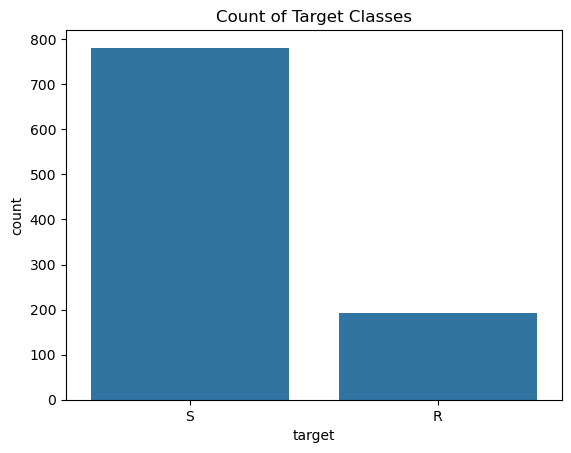

In [ ]:
# Make a bar plot of our targets (hint: seaborn has nice formatting for this)
g = sns.barplot(amr_df.target.value_counts())
g.set_title("Count of Target Classes")

<div class="question" style="color: #534646; background-color: #ffdfa3; padding: 1px; border-radius: 5px;">

#### Q. Will this impact our approach to modeling later on?

</div>

### 3b. What is the quality level of our Genomes?

Now we've assessed and cleaned the target data, lets have a look at the genome quality. How can we even go about assessing genome quality without being a genomics expert?

We can look for outliers!

One thing to note about reviewing outliers is:
- NEVER remove data just by virtue of being an outlier
- Outliers could be junk data but they could also be representing something really unique and important
- Always consult with an expert to assess whether an outlier can be removed

In [10]:
# Lets look at our data again
genome_summary_df.columns

Index(['genome_id', 'genome_name', 'taxon_id', 'genome_status',
       'genome_length', 'gc_content', 'contig_l50', 'contig_n50',
       'chromosomes', 'plasmids', 'contigs', 'patric_cds', 'refseq_cds',
       'trna', 'rrnacoarse_consistency', 'fine_consistency',
       'checkm_completeness', 'checkm_contamination',
       'genome_qualitydate_created', 'date_modified'],
      dtype='object')

Useful data to review:
- gc_content (proportion of the genome nucleotides that are G or C)
- contig_l50 / n50 (size and shape of contigs within our assembly)
- checkm completeness (assessment of how complete the genome is)

Unfortunately we're missing data for a lot of CheckM so we shouldn't rely on it! This is why it's useful to review the data manually first

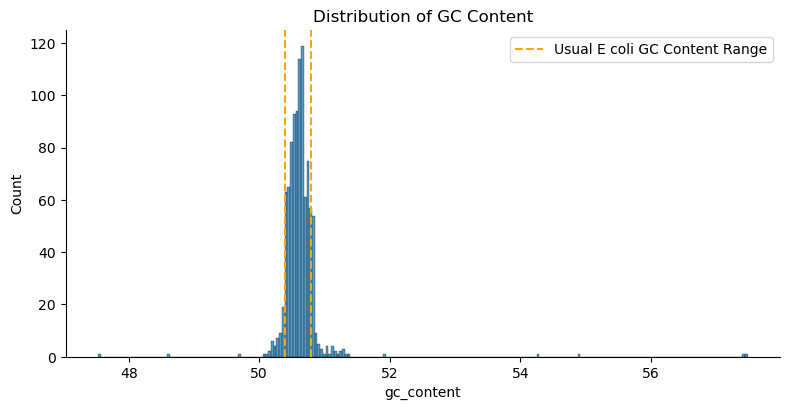

In [11]:
# View the distribution of gc_content across our data
# From a search on google, Escherichia coli should have a GC content around 50.4-50.8%
g = sns.displot(genome_summary_df.gc_content, height=4, aspect=2)
g.axes[0][0].axvline(50.4, ls='--', c='orange', label='Usual E coli GC Content Range')
g.axes[0][0].axvline(50.8, ls='--', c='orange')
g.axes[0][0].legend()
g.set(title='Distribution of GC Content');

<div class="question" style="color: #534646; background-color: #ffdfa3; padding: 1px; border-radius: 5px;">

#### Q. What does this tell us?

</div>

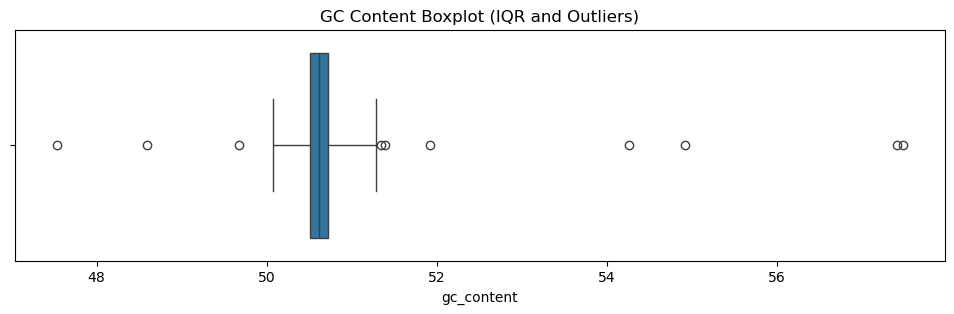

In [12]:
# Which genomes should we consider outliers?
fig, ax = plt.subplots(1, 1, figsize=(12,3))
sns.boxplot(genome_summary_df.gc_content, orient='h', ax=ax, whis=3.0)
ax.set_title('GC Content Boxplot (IQR and Outliers)');

The above boxplot automatically calculates outliers (circles) based on the IQR (the default is 1.5)

This is based on having a normal distribution though and isn't always a perfect solution, ask the expert or make sure to document your assumptions!

In [13]:
# Lets take a look at anything beyond the upper/lower quartiles +/- (IQR * 3.0) to be conservative
lower_quartile, upper_quartile = genome_summary_df.gc_content.dropna().quantile([0.25, 0.75])
iqr = scipy.stats.iqr(genome_summary_df.gc_content.dropna())
upper_limit = upper_quartile + (iqr * 3)
lower_limit = lower_quartile - (iqr * 3)

genome_summary_df[
  (genome_summary_df.gc_content < lower_limit) |
  (genome_summary_df.gc_content > upper_limit)
]

,genome_id,genome_name,taxon_id,genome_status,genome_length,gc_content,contig_l50,contig_n50,chromosomes,plasmids,contigs,patric_cds,refseq_cds,trna,rrnacoarse_consistency,fine_consistency,checkm_completeness,checkm_contamination,genome_qualitydate_created,date_modified
529,562.42709,Escherichia coli strain 287,562,WGS,10639957,54.266815,17.0,191252.0,NaN,NaN,357,10801.0,NaN,169.0,NaN,50.8,NaN,NaN,NaN,2019-03-24T01:48:09.652Z
688,562.77360,Escherichia coli strain 703273,562,Complete,455856,49.680000,1.0,455856.0,NaN,NaN,1,462.0,434.0,5.0,NaN,93.9,7.8,0.0,NaN,2016-01-17T17:07:22.190Z
886,562.12961,Escherichia coli strain F1-8-ERB4,562,WGS,5272562,57.480000,2.0,753501.0,NaN,NaN,30,5155.0,4859.0,83.0,NaN,98.4,95.5,5.8,NaN,2016-11-19T16:10:59.886Z
956,562.42818,Escherichia coli strain M8,562,WGS,5136397,51.915203,6.0,314336.0,NaN,NaN,69,5016.0,NaN,80.0,NaN,97.3,NaN,NaN,NaN,2019-03-24T02:20:08.467Z
995,562.42857,Escherichia coli strain MUGSI_274,562,WGS,5424193,54.917200,4.0,421861.0,NaN,NaN,71,5322.0,NaN,85.0,NaN,98.0,NaN,NaN,NaN,2019-03-24T02:41:41.089Z
1012,562.12962,Escherichia coli strain PB486,562,WGS,5385404,57.420000,5.0,369542.0,NaN,NaN,35,5288.0,4978.0,80.0,NaN,97.9,95.5,4.8,NaN,2016-11-19T16:11:29.319Z
1013,562.58621,Escherichia coli strain PH100,562,WGS,6072913,47.535145,47.0,36900.0,0.0,0.0,1119,6160.0,NaN,99.0,NaN,72.7,NaN,NaN,NaN,2020-03-31T20:12:49.399Z
1016,562.58624,Escherichia coli strain PH108,562,WGS,5010749,51.390720,57.0,23199.0,0.0,0.0,509,5020.0,NaN,74.0,NaN,96.1,NaN,NaN,NaN,2020-03-31T20:12:35.707Z
1026,562.58634,Escherichia coli strain PH20,562,WGS,4808865,51.343445,38.0,38695.0,0.0,0.0,282,4774.0,NaN,70.0,NaN,95.3,NaN,NaN,NaN,2020-03-31T20:02:13.755Z
1078,562.58645,Escherichia coli strain WU44,562,WGS,5980243,48.588543,25.0,70516.0,0.0,0.0,622,5978.0,NaN,89.0,NaN,81.7,NaN,NaN,NaN,2020-03-31T20:13:07.298Z


At this point we could remove these samples or we can keep them.

If in doubt it's generally better to keep them and check later if they seem to be having an impact

## 4. Visualize Key Data Features

Now that we have a good assessment of our data quality - lets move on to understanding our potential modeling features.

This is where we want to start assessing the gene alignments we made last week

In [14]:
# Lets take a quick look at the data to refresh out memories again
n_unique_samples = len(gene_alignment_df.genome_id.unique())
n_unique_genes = len(gene_alignment_df.res_gene.unique())

print(f'Shape of data: {gene_alignment_df.shape}')
print(f'\nN unique samples: {n_unique_samples}')
print(f'\nN unique genes: {n_unique_genes}\n')
display(gene_alignment_df.head(3))

Shape of data: (247853, 8)

N unique samples: 973

N unique genes: 1510



,genome_id,contig,res_gene,match_start,match_end,match_qual,query_str,ref_gene_str
0,562.11346,FLKS01000064,gb|U00096.3|-|3324062-3324911|ARO:3003386|Ecol...,96835,97684,849M,ATGAAACTCTTTGCCCAGGGTACTTCACTGGACCTTAGCCATCCTC...,ATGAAACTCTTTGCCCAGGGTACTTCACTGGACCTTAGCCATCCTC...
1,562.11346,FLKS01000044,gb|AP009048.1|+|3760295-3762710|ARO:3003303|Ec...,61096,63511,2415M,ATGTCGAATTCTTATGACTCCTCCAGTATCAAAGTCCTGAAAGGGC...,ATGTCGAATTCTTATGACTCCTCCAGTATCAAAGTCCTGAAAGGGC...
2,562.11346,FLKS01000070,gb|BA000007.3|+|4990267-4994296|ARO:3003288|Ec...,22038,26067,4029M,TTACTCGTCTTCCAGTTCGATGTTGATACCCAGCGAACGAATCTCT...,TTACTCGTCTTCCAGTTCGATGTTGATACCCAGCGAACGAATCTCT...


### 4a. Visualize Genes Counts

Given the above data we have 1,502 genes which are either present or absent in each of our 773 unique samples based on the alignment. Lets take one random gene and see how it looks

In [15]:
# Select a gene at "random"
random_gene = 'gb|EU274580.1|+|214-1075|ARO:3001030|TEM-164'

We can look up this gene on CARD's website: https://card.mcmaster.ca/ontology/37410

**TEM-164** is an extended-spectrum beta-lactamase found in Klebsiella pneumoniae


In [16]:
# Lets see how often it appears across our dataset
n_samples_gene_present = len(gene_alignment_df[gene_alignment_df.res_gene.isin([random_gene])])
n_samples_gene_absent = n_unique_samples - n_samples_gene_present

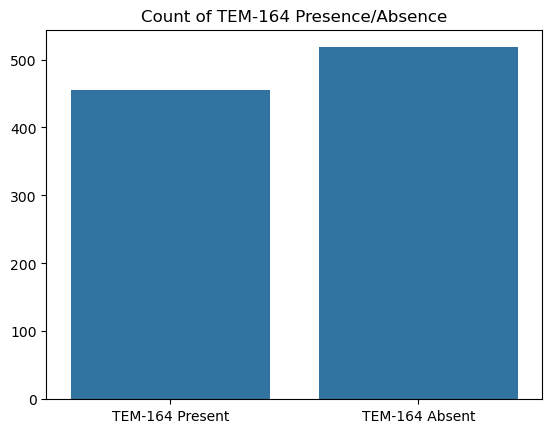

In [17]:
g = sns.barplot(x=['TEM-164 Present', 'TEM-164 Absent'], y=[n_samples_gene_present, n_samples_gene_absent])
g.set_title("Count of TEM-164 Presence/Absence");

<div class="question" style="color: #534646; background-color: #ffdfa3; padding: 1px; border-radius: 5px;">

#### Q. How many resistant samples did we have again?

</div>

That's for just a single gene though - what does this look like across genes?

In [18]:
# First lets make a dataframe with genome_id x res_gene with 1 for present and 0 for absent
gene_presence_absence = (
    gene_alignment_df
    [['genome_id', 'res_gene']]
    .assign(count = 1)
    .pivot_table('count', index='genome_id', columns="res_gene")
    .fillna(0)
) 

In [19]:
# Take a look at this
gene_presence_absence.iloc[0:4, 0:4]

res_gene,gb|AAAGNS010000063.1|-|144-1005|ARO:3000966|TEM-103,gb|AB023477.1|+|0-861|ARO:3001082|SHV-24,gb|AB039845.1|+|25-1945|ARO:3000186|tet(M),gb|AB049569.1|+|0-861|ARO:3000958|TEM-91
genome_id,,,,
562.11346,0.0,0.0,0.0,0.0
562.11347,1.0,0.0,0.0,1.0
562.11349,1.0,0.0,0.0,1.0
562.11557,0.0,0.0,0.0,0.0


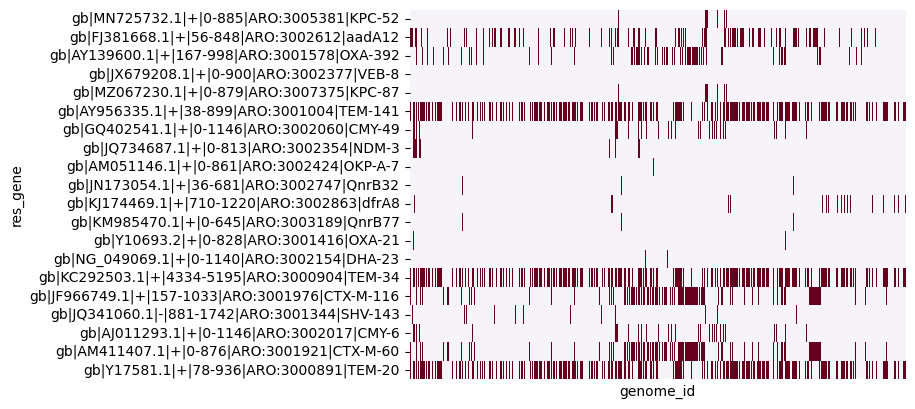

In [20]:
# Visualize the across a random sample of 20 genes
sns.heatmap(
    gene_presence_absence.transpose().sample(20, random_state=130), 
    xticklabels=False,
    cbar=False,
    cmap='PuRd',
);

<div class="question" style="color: #534646; background-color: #ffdfa3; padding: 1px; border-radius: 5px;">

#### Q. How would you interpret this visualization? What is useful information is missing?

</div>

### 4b. Visualize Sequences

Now we've taken a look at the genes themselves, lets take a look at the gene sequences - the raw nucleotide AGCTs

One quick and useful way to review the genomes is to count the prevalence of the nucleotides to understand more about the gene and potential mutations

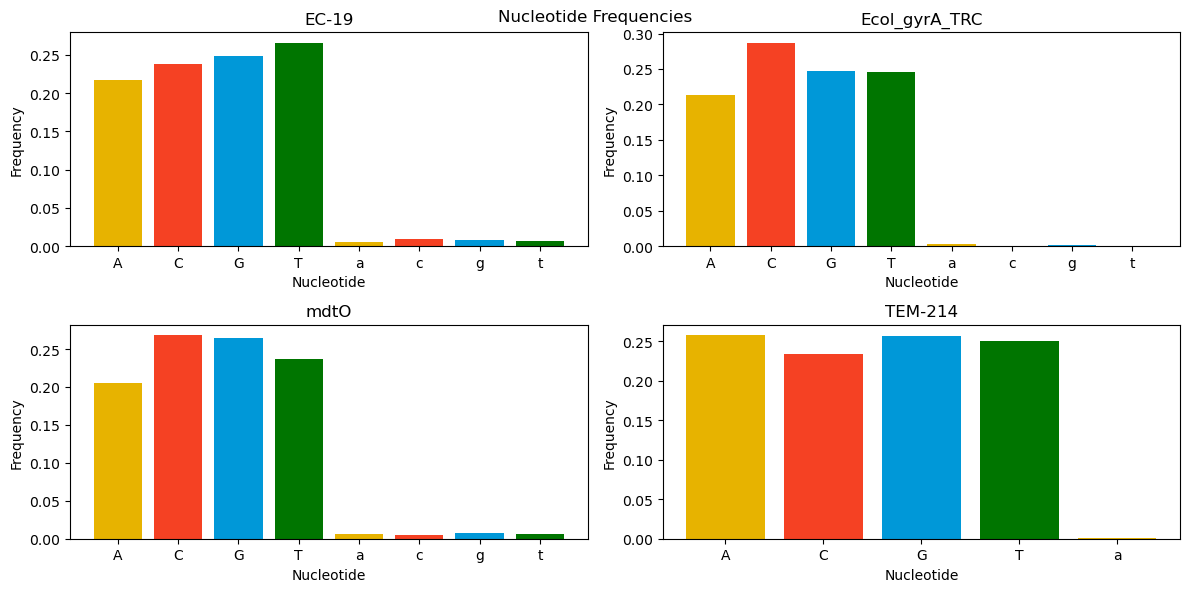

In [21]:
# Function to calculate nucleotide frequency from a sequence
def calculate_nucleotide_frequency(seq):
    freq = Counter(seq)
    total = sum(freq.values())
    return {nucleotide: count / total for nucleotide, count in sorted(freq.items())}

# Sample four random rows from our dataset
random_rows = gene_alignment_df.sample(4, random_state=13)

# Make a 2 by 2 plot and loop through to plot nucleotide counts on each axis
fig, axs = plt.subplots(2, 2, figsize=(12,6))
for ax, gene_row in zip(axs.ravel(), random_rows.itertuples()):
    nucleotide_freq = calculate_nucleotide_frequency(gene_row.ref_gene_str)

    # Bar plot of nucleotide frequencies
    ax.bar(nucleotide_freq.keys(), nucleotide_freq.values(), color=['#e7b300', '#f54123', '#0098d8', '#007500'])
    ax.set_xlabel('Nucleotide')
    ax.set_ylabel('Frequency')
    ax.set_title(gene_row.res_gene.split('|')[-1])
plt.tight_layout()
plt.suptitle("Nucleotide Frequencies");

<div class="question" style="color: #534646; background-color: #ffdfa3; padding: 1px; border-radius: 5px;">

#### Q. Are there any differences? What are these lower case letters?

</div>

Lets recap! 

EDA is a vital part of the data science process and it's worth taking the time to make sure you understand the data you're working with. Hopefully, even in this limited time, you've come away with a few different approaches and techniques you can use when investigating data.

What did we achieve?
1. Loaded and took a look through the raw data
2. Understood which columns we could use
3. Processed our targets and realized how skewed they are
4. Found a few questionable E coli genomes using distributions
5. Started to piece together the relationships between samples and genes
6. Had a look at the raw sequencing data and found some possible mutations

Next steps: Assignment 2 - building on these approaches to review correlations
